In [21]:
from time import time
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
import keras

In [2]:
# check tensorflow version, we want the one that support eager mode
tf.__version__

'2.4.1'

## **DATASET**
Load CIFAR10 dataset and split the training set into train and validation set

In [13]:
from tensorflow.keras.datasets import cifar10

(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()
print('x_train_full shape: {}, y_train_full.shape: {}'
      .format(x_train_full.shape, y_train_full.shape))
print('x_test shape: {}, y_test.shape: {}'.format(x_test.shape, y_test.shape))

170500096/170498071 [==============================] - 2s 0us/step
x_train_full shape: (50000, 32, 32, 3), y_train_full.shape: (50000, 1)
x_test shape: (10000, 32, 32, 3), y_test.shape: (10000, 1)


In [14]:
y_train_full = y_train_full.reshape(y_train_full.shape[0],)
y_test = y_test.reshape(y_test.shape[0],)
print('y_train_full shape: {}, y_test shape: {}'
      .format(y_train_full.shape, y_test.shape))

y_train_full shape: (50000,), y_test shape: (10000,)


In [15]:
# create validation set
split = 0.2
x_train, x_val, y_train, y_val = train_test_split(
    x_train_full, y_train_full, test_size=0.2, random_state=42)
print('x_train: {}, y_train: {}, x_val: {}, y_val: {}'
      .format(x_train.shape, y_train.shape, x_val.shape, y_val.shape))

x_train: (40000, 32, 32, 3), y_train: (40000,), x_val: (10000, 32, 32, 3), y_val: (10000,)


In [16]:
# pick 25 random images and plot
idxs = np.random.randint(x_train.shape[0], size=25)
images = x_train[idxs]
labels = y_train[idxs]
classnames = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

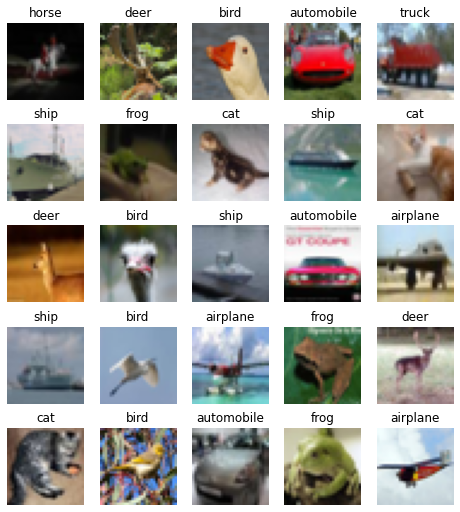

In [7]:
fig, axes = plt.subplots(5,5, figsize=(8,9))
for i, ax in enumerate(axes.flat):
  ax.imshow(images[i])
  ax.axis('off')
  idx = labels[i]
  ax.set_title(classnames[idx])
  
plt.show()

We have the dataset loaded and split into training, validation and test sets, now we can move on to data augmentation

# **DATA PREPROCESSING**

In [16]:
x_train[1,:,:,:].shape # a shape of 1 image is (32,32,3)

(32, 32, 3)

In [17]:
# We should normalize the data
def prep_pixels(train, validation, test):
  train_norm = train.astype('float32')
  test_norm = test.astype('float32')
  valid_norm = validation.astype('float32')

  train_norm = train_norm / 255
  test_norm = test_norm / 255
  valid_norm = valid_norm / 255

  return train_norm, valid_norm, test_norm


In [18]:
train_norm, valid_norm, test_norm = prep_pixels(x_train,x_val,x_test) # y_train, y_val, y_test - corresponding labels

In [ ]:
# here data augmentation should be conducted: check available methods

# **MODEL BUILDING**

In [3]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3)))
model.add(tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3)))
model.add(tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(10, activation='relu'))
model.add(tf.keras.layers.Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 10, 10, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         7

# **MODEL TRAINING**

In [22]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=[keras.metrics.SparseCategoricalAccuracy(name="acc")],
)

In [27]:
history = model.fit(train_norm, y_train, epochs=25, batch_size=64, validation_data=(valid_norm, y_val))

Epoch 1/25
625/625 [==============================] - 61s 98ms/step - loss: 1.5385 - acc: 0.4555 - val_loss: 1.4489 - val_acc: 0.4874
Epoch 2/25
625/625 [==============================] - 60s 96ms/step - loss: 1.1708 - acc: 0.5937 - val_loss: 1.0949 - val_acc: 0.6149
Epoch 3/25
625/625 [==============================] - 60s 96ms/step - loss: 1.0186 - acc: 0.6460 - val_loss: 1.1342 - val_acc: 0.5986
Epoch 4/25
625/625 [==============================] - 61s 98ms/step - loss: 0.9254 - acc: 0.6813 - val_loss: 0.9471 - val_acc: 0.6732
Epoch 5/25
625/625 [==============================] - 61s 98ms/step - loss: 0.8426 - acc: 0.7089 - val_loss: 0.9909 - val_acc: 0.6508
Epoch 6/25
625/625 [==============================] - 61s 98ms/step - loss: 0.7750 - acc: 0.7326 - val_loss: 0.9939 - val_acc: 0.6613
Epoch 7/25
625/625 [==============================] - 60s 97ms/step - loss: 0.7214 - acc: 0.7508 - val_loss: 1.1229 - val_acc: 0.6347
Epoch 8/25
625/625 [==============================] - 61s 97ms

In [28]:
acc = model.evaluate(test_norm, y_test)

313/313 [==============================] - 5s 15ms/step - loss: 1.1486 - acc: 0.7185


In [29]:
acc

[1.1485528945922852, 0.718500018119812]